### Rate map for JC315-20240330_training1 Arm 4

#### Input files
From my data:
* .clu: spike cluster IDs
* .res: spike timestamps
* .des: cluster cell types (filter for PYRs)
* .des_full: (optional) cluster brain region
* .reward_arms: baited arms

From Vlad's preprocessing script output:
* .lwhl_vladVersion: linearized positions per whl frame and arm ID
    - fixed_1d_pos
    - fixed_arm_id
* .speed_vladVersion: animal speed
* .trials_vladVersion: trial start and end times

#### Parameters
length_arm = 160
sampling_rate_whl = 39.0625
sampling_rate_res = 20000
speed_threshold = 5

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
animal = 'JC315'
day = 20240330
session = 'training1'
arm = 3 # honey; 4 in my numbering

In [104]:
path = f"/Users/andrea/adata_laptop/Merged/{animal}-{day}/" # path to my data
preprocessed_path = f"/Users/andrea/github/vlad_analysis_folder/{animal}-{day}/" # path to Vlad's preprocessed files

# Parameters
length_arm = 160

sampling_rate_whl = 39.0625
sampling_rate_res = 20000
sampling_rate_conversion = sampling_rate_res/sampling_rate_whl
speed_threshold = 5

In [56]:
# Import my data
res = np.fromfile(f"{path}{animal}-{day}_{session}.res",dtype=int,sep=" ")
clu_import = np.fromfile(f"{path}{animal}-{day}_{session}.clu",dtype=int, sep=" ")
clu = clu_import[1:] # first cluster is noise
des = open(f"{path}{animal}-{day}.des").read().splitlines()
des_full = open(f"{path}{animal}-{day}.des_full").read().splitlines()
reward_arms = np.fromfile(f"{path}{animal}-{day}_{session}.reward_arms",dtype=int,sep=" ")

# Open Vlad's preprocessed data
whl = pd.read_csv(f"{preprocessed_path}{animal}_{day}_{session}.lwhl_vladVersion", sep=' ')
speed = np.fromfile(f"{preprocessed_path}{animal}_{day}_{session}.speed_vladVersion", dtype=float, sep=' ')
trials = np.loadtxt(f"{preprocessed_path}{animal}_{day}_{session}.trials_vladVersion", dtype=int)
trial_start, trial_end = trials.T

In [52]:
# [rate_matrix_i,
# occupancy_matrix_i,
# all_spike_pos_i,
# all_spike_res_i,
# n_visits_arm_i,
# cell_has_enough_spikes_i,
# spatial_info_skags_i,
# sparsity_skags_i] = compute_rate_maps(smooth_pos,
# segmented_trials_t,
# speed,
# speed_threshold,
# speed_threshold_sign,
# putative_type,
# sr_whl_del_data,
# clu, res,maze_type[rat_i],
# n_bins=legth_arm,
# n_arms=len(speed_threshold_sign),
# smoothing_std=5)


# rate_matrix[(training_num-1*split_grops+split_grops_i]=rate_matrix_i
# occupancy_matrix[(training_num-1)*split_grops+split_grops_i]=occupancy_matrix_i
#                 all_spike_pos[(training_num-1)*split_grops+split_grops_i]=all_spike_pos_i
#                 all_spike_res[(training_num-1)*split_grops+split_grops_i]=all_spike_res_i
#                 n_visits_arm_all[:,(training_num-1)*split_grops+split_grops_i]=n_visits_arm_i
#                 cell_has_enough_spikes[:,:,(training_num-1)*split_grops+split_grops_i]=cell_has_enough_spikes_i
#                 spatial_info_all[(training_num-1)*split_grops+split_grops_i]=spatial_info_skags_i
#                 sparsity_all[(training_num-1)*split_grops+split_grops_i]=sparsity_skags_i

In [53]:
# Plot all trials for arm 4: start with animal position
# Next plot raster plots for all cells: for each trial, plot activity for all cells

In [92]:
# Whl breakdown
print(whl.columns)

x1, y1 = whl.x1.to_numpy(), whl.y1.to_numpy()
fixed_1d_pos = whl.fixed_1d_pos.to_numpy()
fixed_arm_id = whl.fixed_arm_id.to_numpy()

linearized_pos_old = whl.linearized_pos_old.to_numpy()

Index(['x1', 'y1', 'linearized_pos_old', 'arm_ID_old', 'fixed_arm_id',
       'fixed_1d_pos', 'trial_id'],
      dtype='object')


In [97]:
# Filter for trials on selected arm
trial_subset = [
    (s, e) for s, e in trials
    if fixed_arm_id[s] == arm
]

print(f"{len(trial_subset)} trials in arm {arm}")

3 trials in arm 3


Text(0.5, 0, 'Time (s)')

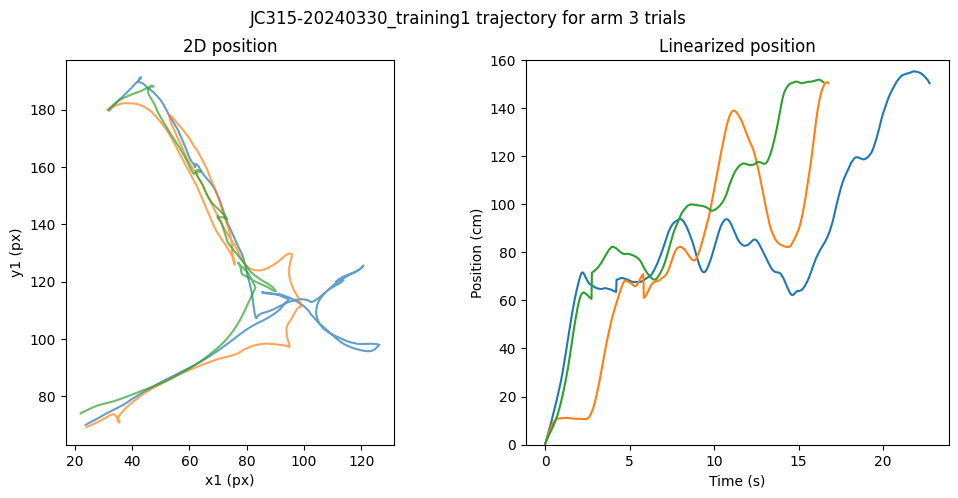

In [117]:
# Plot trajectory for trial subset
length_maze = 200

plt.figure(figsize=(12,5))
plt.suptitle(f"{animal}-{day}_{session} trajectory for arm {arm} trials")

plt.subplot(1,2,1)
for s, e in trial_subset:
    plt.plot(x1[s:e], y1[s:e], alpha=0.7)
plt.gca().set_aspect('equal')
plt.title("2D position")
plt.xlabel('x1 (px)'); plt.ylabel('y1 (px)')

plt.subplot(1,2,2)
for s, e in trial_subset:
    plt.plot(np.arange(e-s) / sampling_rate_whl,
             fixed_1d_pos[s:e])
plt.ylim(0, length_arm); plt.ylabel('Position (cm)')
plt.title("Linearized position")
plt.xlabel('Time (s)')